<a href="https://colab.research.google.com/github/abkerper/project_chd/blob/main/AllisonStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/DS3001/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 13 (delta 2), reused 1 (delta 1), pack-reused 10
Receiving objects: 100% (13/13), 635.39 KiB | 3.24 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv('./project_chd/fhs_train.csv', low_memory = False)

In [4]:
df_test = pd.read_csv('./project_chd/fhs_test.csv', low_memory = False)

In [18]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [19]:
df_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0


In [20]:
df_test.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
5,357,1,53,1.0,0,0.0,0.0,0,1,0,202.0,140.5,90.0,25.82,85.0,74.0,0
6,632,1,41,2.0,1,5.0,0.0,0,0,0,218.0,129.5,93.0,27.80,58.0,83.0,0
7,2090,1,50,4.0,1,35.0,0.0,0,0,0,236.0,102.0,69.0,21.98,70.0,73.0,0


In [21]:
df_train.corr()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Unnamed: 0,1.000000,0.028931,-0.002386,0.005264,0.002710,-0.001035,0.017034,0.028704,0.013487,0.047521,-0.015130,-0.011637,-0.009130,0.002843,0.042875,0.032617,-0.012562
sex,0.028931,1.000000,-0.030139,0.005061,0.205028,0.336615,-0.044798,0.012356,0.008453,0.016438,-0.076235,-0.034453,0.057362,0.074355,-0.111224,0.013454,0.100394
age,-0.002386,-0.030139,1.000000,-0.166460,-0.212695,-0.195504,0.128098,0.056119,0.294195,0.097253,0.269450,0.386833,0.208598,0.143422,-0.010926,0.103984,0.233327
education,0.005264,0.005061,-0.166460,1.000000,0.019864,0.008876,-0.015253,-0.024027,-0.073242,-0.042965,-0.015273,-0.126289,-0.059369,-0.150767,-0.085380,-0.039952,-0.058663
currentSmoker,0.002710,0.205028,-0.212695,0.019864,1.000000,0.770227,-0.057604,-0.039969,-0.107898,-0.031604,-0.027983,-0.140898,-0.115857,-0.176905,0.047681,-0.056631,0.007957
cigsPerDay,-0.001035,0.336615,-0.195504,0.008876,0.770227,1.000000,-0.048006,-0.034373,-0.071204,-0.032327,-0.017445,-0.096031,-0.050059,-0.094391,0.067819,-0.059574,0.050614
BPMeds,0.017034,-0.044798,0.128098,-0.015253,-0.057604,-0.048006,1.000000,0.121645,0.255967,0.047991,0.088243,0.267308,0.207486,0.093656,-0.005011,0.031285,0.095222
prevalentStroke,0.028704,0.012356,0.056119,-0.024027,-0.039969,-0.034373,0.121645,1.000000,0.054817,-0.013326,0.005556,0.060481,0.050653,0.014946,-0.024515,0.000245,0.043344
prevalentHyp,0.013487,0.008453,0.294195,-0.073242,-0.107898,-0.071204,0.255967,0.054817,1.000000,0.083085,0.163553,0.689293,0.617183,0.308250,0.145399,0.084884,0.168785
diabetes,0.047521,0.016438,0.097253,-0.042965,-0.031604,-0.032327,0.047991,-0.013326,0.083085,1.000000,0.052329,0.094032,0.044307,0.086245,0.054426,0.607184,0.099882


In [22]:
vars = ['sex','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

for var in vars:
    print(df_train.loc[:,[var,'TenYearCHD']].groupby(var).describe())

    TenYearCHD                                             
         count      mean       std  min  25%  50%  75%  max
sex                                                        
0       1505.0  0.121595  0.326926  0.0  0.0  0.0  0.0  1.0
1       1239.0  0.194512  0.395984  0.0  0.0  0.0  0.0  1.0
              TenYearCHD                                             
                   count      mean       std  min  25%  50%  75%  max
currentSmoker                                                        
0                 1404.0  0.151709  0.358867  0.0  0.0  0.0  0.0  1.0
1                 1340.0  0.157463  0.364372  0.0  0.0  0.0  0.0  1.0
       TenYearCHD                                             
            count      mean       std  min  25%  50%  75%  max
BPMeds                                                        
0.0        2661.0  0.148440  0.355603  0.0  0.0  0.0  0.0  1.0
1.0          83.0  0.349398  0.479678  0.0  0.0  0.0  1.0  1.0
                TenYearCHD         

In [27]:
vars = ['sex','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

for var in vars:
    print(df_test.loc[:,[var,'TenYearCHD']].groupby(var).describe())

    TenYearCHD                                             
         count      mean       std  min  25%  50%  75%  max
sex                                                        
0        530.0  0.126415  0.332631  0.0  0.0  0.0  0.0  1.0
1        384.0  0.171875  0.377764  0.0  0.0  0.0  0.0  1.0
              TenYearCHD                                             
                   count      mean       std  min  25%  50%  75%  max
currentSmoker                                                        
0                  465.0  0.126882  0.333199  0.0  0.0  0.0  0.0  1.0
1                  449.0  0.164811  0.371423  0.0  0.0  0.0  0.0  1.0
       TenYearCHD                                             
            count      mean       std  min  25%  50%  75%  max
BPMeds                                                        
0.0         886.0  0.141084  0.348304  0.0  0.0  0.0  0.0  1.0
1.0          28.0  0.285714  0.460044  0.0  0.0  0.0  1.0  1.0
                TenYearCHD         

Variables with a high correlation with TenYearCHD: BPMeds, prevalentStroke, prevalentHyp, and diabetes.

In [23]:
y = df_train['TenYearCHD']
vars = ['BPMeds','prevalentStroke','prevalentHyp','diabetes']
X = df_train.loc[:,vars]

In [24]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

In [25]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[11]


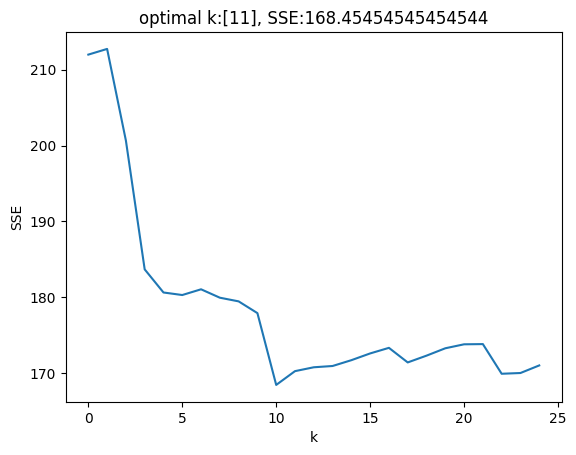

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()